# Reply to Reviewers

In [1]:
# Import Functions
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import numpy as np

plt.rcParams['font.size'] = 12 
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.constrained_layout.use'] = True

# Load Datasets
data_path = './data'
#sens_data = pd.read_csv(data_path+'/sens_opt.csv.bz2') #data with purturbation as multiplier
sens_data = pd.read_csv(data_path+'/sens_opt_nomult.csv.bz2') #data with perturbation as value
sens_data_base = pd.read_csv(data_path+'/sens_baseline.csv.bz2')
cond_data = pickle.load(open(data_path+'/cond_data.pkl', 'rb'))
all_trials = pd.read_csv(data_path+'/all_data.csv.bz2')
best_data = pd.read_csv(data_path+'/best_data.csv.bz2')
figures_path = './figures/'



### Reviewer 1 Responses

1. **<span style="color:black">The only major issue is the effect of $I_{NaL}$. The authors seem to find it protective yet, as cited, its upregulation is usually associated with EADs. The authors should illustrate that $I_{NaL}$ can reduce RR as well.<span style="color:black">** 

Below we show that increases in $I_{NaL}$ decrease RRC in both the baseline and optimized ToR-ORd model. However, RRC decreases more in the baseline model because it is not balanced by increased outward current as in the optimized model. 

add to supplement

2. **How is the limit of 3 on $I_{NaL}$ scaling affecting the optimization?**

In [2]:
data_path = '../new_ga_data/data/'
all_trials = pd.read_csv(data_path+'all_trials.csv')
all_trials_old = pd.read_csv('./data/all_data.csv.bz2')
fig2_data = all_trials[(all_trials['gen']==0) | (all_trials['gen']==50) | (all_trials['gen']==199)]
fig2_data = fig2_data[fig2_data['rrc']!=5.000000e+07] 
fig2_data = fig2_data[['gen', 'trial', 'fitness', 'rrc', 't', 'v', 'cai']]
best_data = all_trials[(all_trials['fitness']==0) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)]
best_data.reset_index(inplace=True)

C:\Users\Kristin\AppData\Local\Temp/ipykernel_30516/1576622527.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figR3.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_30516/1576622527.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figR3.png', trasparent=True)


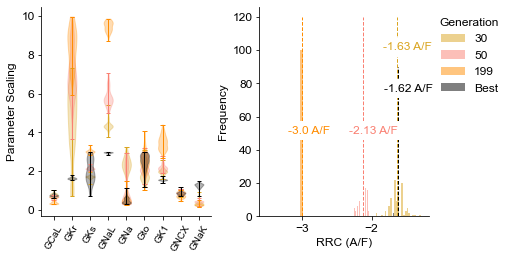

In [3]:
# MAKE PLOT
fig, axs1 = plt.subplots(1, 2, figsize = (7,3.5), constrained_layout = True)
gens = [30, 50, 199]
labels = [str(gen) for gen in gens]
colors = ['goldenrod', 'salmon','darkorange']

for g in range(0, len(gens)):
    data = all_trials[(all_trials['gen']==gens[g])].sort_values(by=['fitness']).reset_index().iloc[0:100]
    #data = all_trials[(all_trials['gen']==gens[g])]
    violin = axs1[0].violinplot(data.filter(like = 'multiplier'))
    axs1[1].hist(-data['rrc']*10, color = colors[g], bins = 25, label = labels[g], alpha = 0.5)
    mean_rrc = np.mean(-data['rrc']*10)
    axs1[1].plot([mean_rrc, mean_rrc], [0, 120], color = colors[g], linestyle = 'dashed', linewidth= 1)
    if g == 0:
        height = 100
    else:
        height = 50
    axs1[1].annotate(str(round(mean_rrc,2))+' A/F', ((mean_rrc)-0.2,height), bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2), color = colors[g])
    
    for vp in violin['bodies']:
        vp.set_facecolor(colors[g])
        vp.set_edgecolor(colors[g])

    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(colors[g])
        vp.set_linewidth(1)


#data = all_trials_old[(all_trials_old['gen']==99)].sort_values(by=['fitness']).reset_index().iloc[0:100]
data = pd.read_csv('./data/best_data.csv.bz2')
violin = axs1[0].violinplot(data.filter(like = 'multiplier'))
axs1[1].hist(-data['rrc'].iloc[0:80]*10, color = 'black', bins = 25, alpha = 0.5, label = 'Best')
mean_rrc = np.mean(-data['rrc']*10)
axs1[1].plot([mean_rrc, mean_rrc], [0, 90], color = 'black', linestyle = 'dashed', linewidth= 1)
axs1[1].annotate(str(round(mean_rrc,2))+' A/F', ((mean_rrc)-0.2,75), bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2), color = 'black')

for vp in violin['bodies']:
    vp.set_facecolor('black')
    vp.set_edgecolor('black')

for partname in ('cbars','cmins','cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

axs1[0].set_ylabel('Parameter Scaling')
axs1[0].set_xticks(list(range(1, 10)))
axs1[0].set_xticklabels(['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK'], rotation = 60, fontsize = 10);

axs1[1].set_ylabel('Frequency')
axs1[1].set_xlabel('RRC (A/F)')
axs1[1].legend(bbox_to_anchor = (1,1), frameon=False, title = 'Generation')

plt.savefig(figures_path+'figR3.pdf', trasparent=True)
plt.savefig(figures_path+'figR3.png', trasparent=True)

3. **<span style="color:black">It would be nice to see some current traces in detail. It is difficult to differentiate the curves as presented in Figure 7.<span style="color:black">** 

add to supplement

4. **<span style="color:black">The relative weights of the three cost functions are not described. How does C2 compare to C3? It is implied that unless the voltage waveform is within bounds, this error will dominate, and when the voltage and calcium are physiological, then C3 is the only error.<span style="color:black">**

C1 is much greater than C2 across all generations. C2 is much greater than C3 early in the optimization.

make text more clear and highlight S1... it wasnt clearly stated that this was in the supplement...

total_morph_error=1271741.3475829961
total_feature_error=117373.66740137692
rrc_error=4506.82375


C:\Users\Kristin\AppData\Local\Temp/ipykernel_19508/3424476248.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figR1.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_19508/3424476248.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figR1.png', trasparent=True)


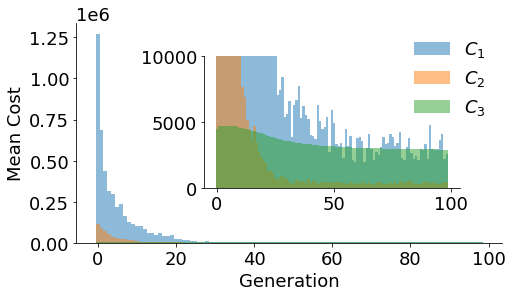

In [3]:
fig, axs = plt.subplots(1, figsize = (7,4), constrained_layout = True)
axs_in = axs.inset_axes([0.3, 0.25, 0.6, 0.6]) 

def find_mode(np_array):
    vals, counts = np.unique(np_array, return_counts=True)
    index = np.argmax(counts)
    return(vals[index])

costs = ['total_morph_error', 'total_feature_error', 'rrc_error']
labels = ['$C_1$', '$C_2$', '$C_3$']

for i in range(0, len(costs)):
    cost = costs[i]
    all_cs = []
    for g in range(0, 99):
        c = np.mean(all_trials[all_trials['gen']==g][cost].tolist())
        if g == 0:
            print(cost+'='+str(c))
        #c = find_mode(np.array(all_trials[all_trials['gen']==g][cost]))
        all_cs.append(c)

    axs.bar(range(0, len(all_cs)), all_cs, 1, alpha = 0.5, label = labels[i])
    axs_in.bar(range(0, len(all_cs)), all_cs, 1, alpha = 0.5)

axs_in.set_ylim([0, 10000])
axs.set_ylabel('Mean Cost')
axs.set_xlabel('Generation')
axs.legend()

plt.savefig(figures_path+'figR1.pdf', trasparent=True)
plt.savefig(figures_path+'figR1.png', trasparent=True)


5. **<span style="color:black">In equation 2, what is $F_{B}$, $F_{UB}$, $F_{LB}$ depending?<span style="color:black">**

Make updates to manuscript. 

6. **<span style="color:black">Why was Vpeak needed in C2 as the voltage was already constrained?<span style="color:black">**

Upstroke was not included in C1. Vpeak in this case is the maximum voltage value which for many torord individuals is not included in C1. Therefore, it is included as a feature in C2 to ensure that the upstroke, and maximum voltage is indeed physiologic.

7. **In figure 3, were all APDs for the optimized sets comparable? You only show one trace. Could an average be plotted with bars?**

I plotted the population of 220 best in 3B. I will make updated to the legend to make this more clear. 

Do the same in D as I did in E...

In [70]:
best_data.filter(like= 'multiplier').iloc[bad_inds[0]].to_dict()

{'i_cal_pca_multiplier': 0.9413583176089632,
 'i_kr_multiplier': 1.6969238385767962,
 'i_ks_multiplier': 1.2568486844860036,
 'i_nal_multiplier': 2.9909649105478744,
 'i_na_multiplier': 0.5721524578312536,
 'i_to_multiplier': 2.811303234451506,
 'i_k1_multiplier': 1.5642738369659908,
 'i_NCX_multiplier': 0.8817835504871164,
 'i_nak_multiplier': 1.2770958757230635}

[272.2797523062866, 272.3001930369263, 272.47709311968083, 272.5542845416003, 272.56165996939717]
[0, 1, 1, 1, 1]
[283.9647429160312, 283.73861617589034, 283.9066065171728, 283.65151270232855, 283.79884242374874]
[0, 1, 1, 1, 1]
[307.8443375335681, 308.0859433135373, 308.054818736141, 307.667920674995, 308.17248081954995]
[0, 1, 1, 1, 1]
[342.66834080438844, 342.26863223198495, 342.3254168600988, 342.5656498137155, 342.5401717052214]
[0, 1, 1, 1, 1]
[378.36619382566266, 378.00235890715896, 377.79283276458546, 377.99778791011886, 377.8940939731524]
[0, 1, 1, 1, 1]
[395.89317184704623, 521.559833102643, 395.0873166845058, 520.9667719764625, 395.6833570517897]
[0, 1, 1, 1, 1]
[510.9715160796221, 511.0348667565253, 510.7144883550859, 510.9236386031216, 510.46811097787713]
[1, 1, 1, 1, 1]
[506.41065719110986, 506.3258547706895, 505.9592604311888, 506.0896555130721, 506.29598870925065]
[1, 1, 1, 1, 1]


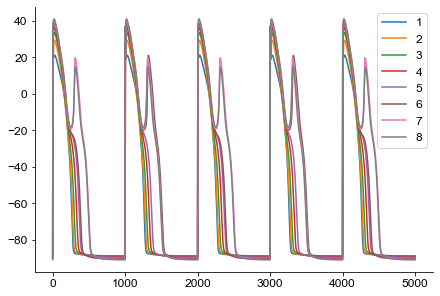

In [76]:
from important_functions import run_model, calc_APD, detect_abnormal_ap, get_last_ap
values = [1, 2, 3, 4, 5, 6, 7, 8]
conductance = 'i_cal_pca_multiplier'
bad_inds = list(robust_data[robust_data['apd90_8']>400].index)
i_kb = 1

all_data = {'type': 'baseline', 'conductance':conductance} 

for value in values:

    # baseline torord model 
    #ind = best_data.filter(like= 'multiplier').iloc[bad_inds[0]].to_dict()
    #ind[conductance]=ind[conductance]*value
    dat, IC = run_model([{conductance: value, 'i_kb_multiplier': i_kb}], 5)
    #dat, IC = run_model([ind], 5)
    t = dat['engine.time']
    v = dat['membrane.v']
    plt.plot(t, v, label = str(value))
    apd90s = []
    results = []
    for a in [0, 1, 2, 3, 4]:
        ap_data = get_last_ap([t, v], a, type = 'half')
        apd90s.append(calc_APD(ap_data['t'], ap_data['v'], 90))
        results.append(detect_abnormal_ap(ap_data['t'], ap_data['v'])['result'])
    all_data['t_'+str(value)] = str(list(t))
    all_data['v_'+str(value)] = str(list(v))
    all_data['apd90_'+str(value)] = str(apd90s)
    all_data['result_'+str(value)] = str(results)
    print(apd90s)
    print(results)

plt.legend()

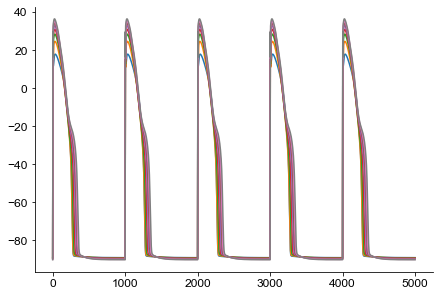

In [6]:
from important_functions import run_model, get_last_ap, calc_APD, detect_abnormal_ap
args = (0, best_data, 'i_cal_pca_multiplier', [1, 2, 3, 4, 5, 6, 7, 8], 1)
i, best_data, conductance, values, i_kb = args
all_data = {'type': 'optimized '+str(i)}

if i_kb != 1:
    all_data['conductance'] = conductance + ' & i_kb_multiplier'
else:
    all_data['conductance'] = conductance

for value in values:

    # best ind
    best_ind = best_data.filter(like = 'multiplier').iloc[i].to_dict()
    best_ind['i_kb_multiplier'] = i_kb
    best_ind[conductance] = best_ind[conductance]*value

    best_dat, best_IC = run_model([best_ind], 5)
    t_best = best_dat['engine.time']
    v_best = best_dat['membrane.v']
    apd90s = []
    results = []
    plt.plot(t_best, v_best)
    for a in [0, 1, 2, 3, 4]:
        ap_data = get_last_ap([t_best, v_best], a, type = 'half')
        apd90s.append(calc_APD(ap_data['t'], ap_data['v'], 90))
        results.append(detect_abnormal_ap(ap_data['t'], ap_data['v'])['result'])

    #save data to existing dict
    all_data['t_'+str(value)] = str(list(t_best))
    all_data['v_'+str(value)] = str(list(v_best))
    all_data['apd90_'+str(value)] = str(apd90s)
    all_data['result_'+str(value)] = str(results)

In [77]:
robust_data = pd.read_csv('./data/robust_data_ical.csv.bz2')
robust_data.loc[len(robust_data.index)] = list(all_data.values())
robust_data

,type,conductance,t_1,v_1,apd90_1,result_1,t_2,v_2,apd90_2,result_2,...,apd90_6,result_6,t_7,v_7,apd90_7,result_7,t_8,v_8,apd90_8,result_8
0,optimized 0,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
1,optimized 1,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
2,optimized 2,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
3,optimized 3,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
4,optimized 4,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,optimized 218,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
219,optimized 219,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
220,optimized 220,i_cal_pca_multiplier,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
221,baseline,i_cal_pca_multiplier,"[0.0, 3.432259064882502e-06, 0.034326022907889...","[-88.9596014938379, -88.95960149420857, -88.95...","[272.44475742487293, 272.23257483014015, 272.8...","[0, 1, 1, 1, 1]","[0.0, 3.432259064882502e-06, 0.034326022907889...","[-89.20196425060257, -89.20196425094834, -89.2...","[283.5863581931002, 283.770179621033, 283.8389...","[0, 1, 1, 1, 1]",...,"[511.94494953236955, 560.8316771232672, 374.23...","[1, 1, 1, 1, 1]","[0.0, 3.432259064882502e-06, 0.034326022907889...","[-90.94410230952782, -90.94410230986716, -90.9...","[511.2004915233129, 510.8289400975058, 510.642...","[1, 1, 1, 1, 1]","[0.0, 3.432259064882502e-06, 0.034326022907889...","[-91.04907671050854, -91.04907671081284, -91.0...","[506.1964599294274, 506.371450464659, 506.2115...","[1, 1, 1, 1, 1]"


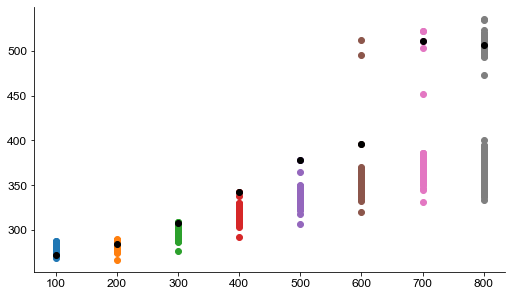

In [45]:
fig, axs = plt.subplots(1, figsize = (7,4), constrained_layout = True)
vals = [1, 2, 3, 4, 5, 6, 7, 8]
for v in range(0, len(vals)):
    data_og = list(robust_data['apd90_'+str(vals[v])])
    data = [d for d in data_og if d != 500]
    axs.scatter([vals[v]*100]*len(data), data)

baseline_data = robust_data[robust_data['type']=='baseline'].filter(like = 'apd90').reset_index(drop=True).iloc[0].to_list()
axs.scatter([v*100 for v in vals], baseline_data, color = 'Black')

(-100.0, 100.0)

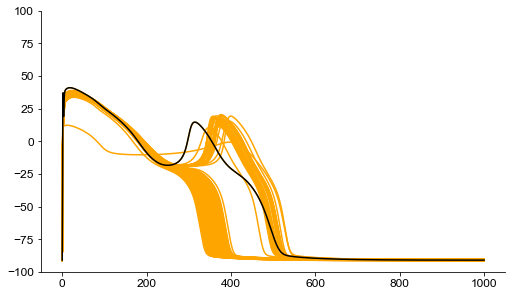

In [55]:
fig, axs = plt.subplots(1, figsize = (7,4), constrained_layout = True)
v = 8

for i in range(0, len(robust_data['type'])-1):
    plt.plot(eval(robust_data['t_'+str(v)][i]), eval(robust_data['v_'+str(v)][i]), color = 'orange')


plt.plot(eval(robust_data['t_'+str(v)][221]), eval(robust_data['v_'+str(v)][221]), color = 'black')

plt.ylim([-100,100])

In [62]:
best_data.filter(like = 'multiplier')

,i_cal_pca_multiplier,i_kr_multiplier,i_ks_multiplier,i_nal_multiplier,i_na_multiplier,i_to_multiplier,i_k1_multiplier,i_NCX_multiplier,i_nak_multiplier
0,0.723975,1.666156,1.244584,2.990965,0.612777,1.941215,1.489203,0.835400,0.904410
1,0.764140,1.693433,1.580147,2.989454,0.355584,2.538980,1.612276,0.935674,1.070485
2,0.774130,1.719915,1.471131,2.993505,0.595478,1.202880,1.555926,0.910194,0.904410
3,0.763610,1.643800,1.471131,2.967839,0.560623,2.583057,1.566069,0.842730,1.097802
4,0.764140,1.693433,1.580147,2.989454,0.355584,2.610450,1.612276,0.935674,1.070485
...,...,...,...,...,...,...,...,...,...
215,0.726607,1.573701,2.883350,2.864154,0.407749,2.129742,1.534795,0.803987,1.355873
216,0.739856,1.610833,2.986542,2.994922,0.664725,2.755645,1.628012,0.933328,1.124421
217,0.745099,1.611135,2.900943,2.928498,0.445923,2.070788,1.588803,0.857427,1.343109
218,0.719600,1.594344,2.711487,2.963600,0.428726,2.510723,1.571452,0.853016,1.390073


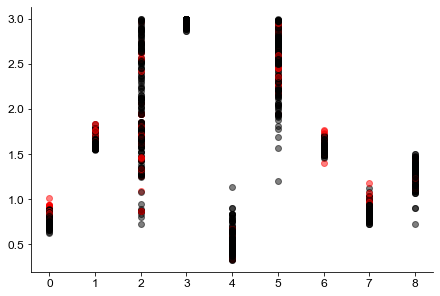

In [66]:
bad_inds = list(robust_data[robust_data['apd90_8']>400].index)

conductance_data = best_data.filter(like = 'multiplier')
for i in range(0, len(conductance_data['i_cal_pca_multiplier'])):
    if i in bad_inds:
        plt.scatter(range(0, len(conductance_data.iloc[i])), conductance_data.iloc[i], color = 'red', alpha = 0.5)
    else:
        plt.scatter(range(0, len(conductance_data.iloc[i])), conductance_data.iloc[i], color = 'black', alpha = 0.5)

In [ ]:
fig, axs = plt.subplots(1, figsize = (7,4), constrained_layout = True)
robust_data = pd.read_csv('./data/robust_data_ical.csv.bz2')
# D) ICAL PURTURBATION
ical_df = robust_data[robust_data['conductance']=='i_cal_pca_multiplier']
axs1[1].plot(ical_df[ical_df['type']=='torord']['value']*100, ical_df[ical_df['type']=='torord']['apd90'].tolist(), label = 'torord', marker = 'o', color = 'black', markersize = 2)
axs1[1].plot(ical_df[ical_df['type']=='optimized']['value']*100, ical_df[ical_df['type']=='optimized']['apd90'].tolist(), label = 'optimized', marker = 'o', color = 'cadetblue', markersize = 2)
axs1[1].set_xlabel('$I_{CaL}$ Scaling (%)')
axs1[1].set_ylabel('APD (ms)')
axs1[1].set_xticklabels([0, 250, 500, 750], fontsize = 10);


for i in list(range(0, len(ical_df))):
    if ical_df['result'][i] == 1:
        axs1[1].scatter(ical_df['value'][i]*100, ical_df['apd90'][i], color = 'red', s = 18)

8. **<span style="color:black">IBias is given as a positive in the catption while is is negative in the text<span style="color:black">**

I updated the text so it is consistent. 

9. **<span style="color:black">In Figure 5, is Ibias-Ibias just no bias? It is confusing.<span style="color:black">**

change to baseline

### Reviewer 2 Responses

1.  **<span style="color:black">Minor: The abstract state the optimization improved RRC by 77\%. It would be more clear to state that this value is an average, and it would be beneficial to also state the maximum, i.e, "improved RRC by up to XX\%".</span>**

This is a great suggestion and has been updated in the abstract of the manuscript. 



In [13]:
# Calculations
mean_rrc = np.mean(all_trials[all_trials['gen']==99]['rrc'])*10
best_rrc = max(best_data['rrc'])*10
torord_rrc = 0.915
average_increase = ((mean_rrc - torord_rrc)/torord_rrc)*100
max_increase = ((best_rrc - torord_rrc)/torord_rrc)*100
print('The optimization improved RRC by '+str(average_increase)+' percent on average and up to '+str(max_increase)+' percent.')


The optimization improved RRC by 68.47207138875962 percent on average and up to 84.4808743169399 percent.


2. **<span style="color:black">Regarding the calculation of the GA cost function, is there a weighting on the C1 and C2 terms? Specifically as written, it appears that the C1 term is a sum of 990 values, while C2 is a sum of 5 values, so at first glance it would seem that c1 is effectively weighted more substantially. In a more practical mannor, is there some aspect of normalization of the voltage and/or features? Otherwise, C1 is in units of voltages, while C2 is a sum of features with different units, so addition of these terms would not be meaningful. Please clarify.</span>**

C1 is indeed weighted more substantially due to the addition of 990 values. 

Yes, the cost terms were normalized so they could be added. We have updated the manuscript to reflect this. Specifically C1, C2, and C3 were normalized by $1/mv^2$, $1/(mv^2ms+mv^2+\mu Mms+2ms^4)$, and $F/A$, respectively. 

We added clarity to the text. 

3. **<span style="color:black">Regarding Methods, can the authors explain their rationale for using the Spearman correlation vs the Pearson correlation to assess correlations between ionic conductances? The Spearman correlation between two conductances will change depending on the other members of the group used to calculate the rankings, whereas the Pearson correlation will depend on the conuctance magnitudes. I suspect the authors would find the same trends using both approaches, but the relative strength of the correlations may differ.<span style="color:black">**

We chose spearman because it does not require a normal distribution, and is not sensitive to outliers. Since the conductances were chosen from a log normal distribution the normality assumption could not be satisfied. 

4. **<span style="color:black">An interesting and fairly simple analysis that I would suggest to the authors is to show the correlation between the conductances and the RRC for the optimized models. This will likely convey similar information as the sensitivity analysis in Figure 4 but may be easier to understand.</span>**


RESPOND IN REBUTTAL ONLY THAT WE DECIDED AGAINST THIS!
It does show somewhat similar results but I am not confident about what data to insert. Currently, the data for BM is all the individuals before generation 15 and OM is all the individuals after generation 15. Here you can see that the top 4 conductances of RRC importance are the same as that in the manuscript (IK1, IKR, ICAL, AND INCX) for BM but not in the correct order. For OM, the top 2 conductances are the same as that in the manuscript but also not in the correct order. 

C:\Users\Kristin\AppData\Local\Temp/ipykernel_19508/3470267344.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figR2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_19508/3470267344.py:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figR2.png', trasparent=True)


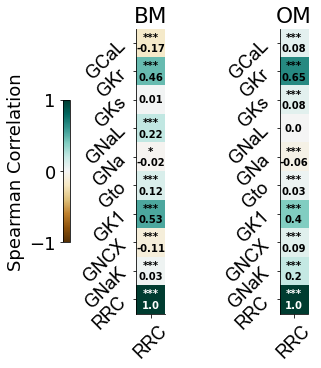

In [4]:
fig, axs1 = plt.subplots(1, 2, figsize = (5,5), constrained_layout = True)

from scipy.stats import spearmanr

stat = spearmanr
color_map = 'BrBG'
cond_labels = ['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK', 'RRC']
cond_labels_x = ['RRC']
gens = [15, 85]
titles = ['BM', 'OM']

for g in range(0, len(gens)):
    if g == 0:
        # 19125 inds
        data = all_trials[(all_trials['gen']<gens[g])][['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_ks_multiplier', 'i_nal_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier', 'rrc']]
        #data = all_trials[(all_trials['gen']<gens[g]) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)][['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_ks_multiplier', 'i_nal_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier', 'rrc']]
    else:
        #50307 inds
        data = all_trials[(all_trials['gen']>gens[g])][['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_ks_multiplier', 'i_nal_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier', 'rrc']]
        #data = all_trials[(all_trials['gen']>gens[g]) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)][['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_ks_multiplier', 'i_nal_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier', 'rrc']]

    corr = data.corr(method = 'spearman')
    pval = data.corr(method=lambda x, y: stat(x, y)[1]) - np.eye(*corr.shape)

    #drop columns you dont want show in matrix
    corr.drop(labels=['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_ks_multiplier', 'i_nal_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier'], axis=1, inplace=True)
    pval.drop(labels=['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_ks_multiplier', 'i_nal_multiplier', 'i_na_multiplier', 'i_to_multiplier', 'i_k1_multiplier', 'i_NCX_multiplier', 'i_nak_multiplier'], axis=1, inplace=True)

    im = axs1[g].imshow(corr, cmap = color_map, vmin=-1, vmax=1)
    axs1[g].set_xticks(np.arange(len(cond_labels_x)))
    axs1[g].set_xticklabels(cond_labels_x, rotation = 45, fontname="Arial");
    axs1[g].set_yticks(np.arange(len(cond_labels)))
    axs1[g].set_yticklabels(cond_labels, rotation = 45, fontname="Arial");
    axs1[g].set_title(titles[g])

    texts = []
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            t = str(round(corr.iloc[i,j], 2))
            pv = pval.iloc[i,j]
            p = ''
            c = 'black'
            if pv < 0.05: 
                p = '*\n'
            if pv < 0.01: 
                p = '**\n'
            if pv < 0.001: 
                p = '***\n'
            if corr.iloc[i,j]>0.8 or corr.iloc[i,j]<-0.8:
                c = 'white'
            text = im.axes.text(j, i, p+t, color = c, ha="center", va="center", fontsize=10, fontweight="bold")
            texts.append(text)

cbar = axs1[0].figure.colorbar(im, ax=axs1, shrink = 0.5, location = 'left')
cbar.ax.set_ylabel('Spearman Correlation', rotation=90, va="bottom")

plt.savefig(figures_path+'figR2.pdf', trasparent=True)
plt.savefig(figures_path+'figR2.png', trasparent=True)


5. **In the results shown in Figure 3D-E and S3, it would be beneficial to show the ranges for the optimized population (perhaps the best 220 that are shown in Figure 3A), in a new or supplemental Figure. This would be hlepful to answer the question of "Do all of the optimized exhibit enhanced resistance to pro-arrythmia?" I suspect that the entire population will, but it would be helpful to know the degree, relative to the baseline**

Update this figure and add clarity to manuscript!!


6. **<span style="color:black">Minor: It is worth noting that the Miller et al 2023 study cited similarly finds negative correlation between GKr and GKs and positive correlation between GCaL and GKr in a population study, albeit with a population constrained by physiological biomarkers not high RRC.<span style="color:black">**

Miller et al found a ngative corrlation between IKR and IKs in a population of models. In cells suseptible to LQT3-associated mutations, there is a weak but positive correlation between these conductances. 

They also found that a correaltion between IKr and ICaL, and specifically, those with high ICaL, and therefore, high IKr were able to better poopose signficicant APD prolongation and EADs in the presence of an LQT3-associated mutation. 

7. **Once point that I would like to see discussed a bit further. The authors make a compelling argument that numerical optimization of conductances can lead to myocytes with greater replarization reserve. But is there experimental evidence - from an evolutionary or regulatory prespective - that this occurs in myocytes in either development or remodeling? In short, myocytes can improve repolarization reserve, but do they? If there is not evidence, this could still be a useful disscussion point to motivate studies to investigate this.**

Address in discussion of text. 